In [16]:
import warnings
warnings.simplefilter('ignore')

# %matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [17]:
# Read the csv file into a pandas DataFrame

fla = pd.read_csv('Florida_2.csv')
#fla.head()

In [78]:
naics = fla.loc[fla['NaicsCode'] == 238220]

In [79]:
len(naics)

216

In [80]:
# Selecting Independent and Dependent variables
X = naics[["PctOfGuarantee","DebtCoverage", "Leverage", "PctOfPrinColl","GrossApproval"]]
y = naics["SBAGuarantee"]

# Print the shape of the variables
print(X.shape, y.shape)

(216, 5) (216,)


In [91]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=60)
                                                          #Size of the Test Population
X_train.head()

,PctOfGuarantee,DebtCoverage,Leverage,PctOfPrinColl,GrossApproval
4714,0.50,2.25,4.00,1.00,21000
8971,0.75,1.40,5.00,0.30,2405500
8895,0.90,2.25,4.00,1.00,140000
14731,0.50,2.25,2.75,0.35,50000
4648,0.50,2.25,4.00,1.00,27000


In [114]:
# Import the Model and Fit the Model

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [93]:
# The Predicted (y) for the Industry
sum(model.predict(X_test) - y_test)

207571.05090934556

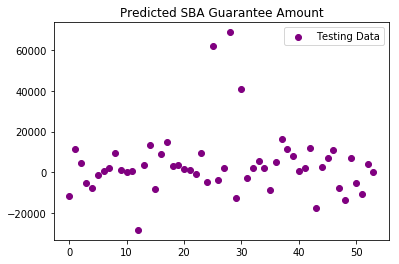

In [115]:
plt.scatter(range(0, len(y_test)), model.predict(X_test) - y_test, c="purple", label="Testing Data")
plt.title("Predicted SBA Guarantee Amount")
plt.legend()
plt.show()

In [95]:
# Overall Score for the model
model.score(X, y)

0.99874513574796964

In [125]:
# LASSO model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import Lasso

model = Lasso(alpha=.7)
model.fit(X_train, y_train)
sum(model.predict(X_test) - y_test)

207470.46153951812

In [126]:
# Ridge model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import Ridge

model = Ridge(alpha=.7)
model.fit(X_train, y_train)
sum(model.predict(X_test) - y_test)

162985.58485022461

In [127]:
# ElasticNet model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import ElasticNet

model3 = ElasticNet(alpha=.7)
model3.fit(X_train, y_train)
sum(model3.predict(X_test) - y_test)

-7933.4014305878372

In [132]:
one_naics = fla[fla['NaicsCode'] == 238220]

In [136]:
hvac = one_naics[['BorrName', 'GrossApproval', 'SBAGuarantee', 'PrinBalanceCollected', 'COAmount']]

In [137]:
hvac.head(10)

,BorrName,GrossApproval,SBAGuarantee,PrinBalanceCollected,COAmount
25,"Elite Holdings of Manatee, LLC",306000,275400,137700.0,0
136,"A Proud Plumber, Inc.",25000,22500,9577.0,15423
170,"COASTAL COOLING & HEATING, LLC",15000,7500,4756.0,10244
268,PEAK PLUMBING LLC,200000,150000,34795.0,165205
280,"ESVT Associates, Inc",601000,450750,96447.0,504553
371,ITBN LLC,1824000,1368000,547200.0,0
615,"REDD G, INC.",514500,385875,154350.0,0
620,A-Z Climate Contol Specialist,328000,246000,98400.0,0
665,"Sherenit, LLC",240000,120000,72000.0,0
666,"J.J. DOUGLAS SERVICES, INC.",25000,12500,7500.0,0
